In [5]:
import psycopg2
from psycopg2.extensions import connection

In [7]:
from dotenv import load_dotenv
import os
load_dotenv()

DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [26]:
conn = psycopg2.connect(f"dbname={DB_NAME} user={DB_USER} password={DB_PASSWORD} host=localhost")

In [25]:
cur.close()
conn.close()


In [21]:
table = "social_network_2"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table}")
raw_data = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
cur.close()

In [22]:
# Create a dataframe

import pandas as pd
df = pd.DataFrame(raw_data, columns=column_names)
df.head()

,id,compose_post_service_cpu,compose_post_service_memory,home_timeline_redis_cpu,home_timeline_redis_memory,home_timeline_service_cpu,home_timeline_service_memory,jaeger_cpu,jaeger_memory,media_frontend_cpu,...,user_mongodb_memory,user_service_cpu,user_service_memory,user_timeline_mongodb_cpu,user_timeline_mongodb_memory,user_timeline_redis_cpu,user_timeline_redis_memory,user_timeline_service_cpu,user_timeline_service_memory,timestamp
0,1,0.006424,0.980469,0.959585,2.398438,0.006043,0.996094,0.197908,8.660156,0.008158,...,58.183594,0.021785,1.722656,3.358650,58.699219,1.236689,2.652344,0.027374,1.515625,1715007221
1,2,0.006429,0.980469,0.962345,2.648438,0.006043,0.996094,0.198233,8.660156,0.008158,...,58.183594,0.021809,1.722656,3.363858,58.699219,1.239358,2.402344,0.027454,1.515625,1715007231
2,3,0.006429,0.980469,0.964667,2.648438,0.006050,0.996094,0.198954,8.660156,0.008158,...,58.183594,0.021848,1.722656,3.363858,58.699219,1.241313,2.402344,0.027488,1.515625,1715007241
3,4,0.006438,0.980469,0.964667,2.648438,0.006055,0.996094,0.198954,8.660156,0.008158,...,58.183594,0.021848,1.722656,3.371908,58.699219,1.241313,2.402344,0.027488,1.515625,1715007251
4,5,0.006442,0.980469,0.967405,2.398438,0.006055,0.996094,0.199289,8.660156,0.008158,...,58.183594,0.021874,1.722656,3.377358,58.699219,1.244764,2.402344,0.027554,1.515625,1715007261


In [27]:
table = "social_network_predicted_2"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table}")
raw_predicted_data = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
cur.close()

In [28]:
# Create a dataframe

import pandas as pd
df_predicted = pd.DataFrame(raw_predicted_data, columns=column_names)
df_predicted.head()

,id,compose_post_service_cpu,compose_post_service_memory,home_timeline_redis_cpu,home_timeline_redis_memory,home_timeline_service_cpu,home_timeline_service_memory,jaeger_cpu,jaeger_memory,media_frontend_cpu,...,user_mongodb_memory,user_service_cpu,user_service_memory,user_timeline_mongodb_cpu,user_timeline_mongodb_memory,user_timeline_redis_cpu,user_timeline_redis_memory,user_timeline_service_cpu,user_timeline_service_memory,timestamp
0,7,2.300845,2.928361,2.228725,4.484017,2.550373,4.307755,0.551348,395.40656,-0.043714,...,23.848688,0.316492,1.343949,7.591145,49.125725,2.836651,2.788731,4.352682,4.374788,1715007819
1,8,2.302548,2.929752,2.228534,4.483552,2.550777,4.305149,0.551061,395.41815,-0.043821,...,23.848930,0.316479,1.344017,7.591687,49.144180,2.836497,2.790185,4.352625,4.375329,1715007829
2,9,2.302677,2.930654,2.228274,4.483422,2.551570,4.302215,0.550503,395.37650,-0.043806,...,23.849570,0.316512,1.344095,7.591361,49.153557,2.836317,2.791632,4.351944,4.376816,1715007839
3,10,2.300739,2.929759,2.228417,4.483648,2.550756,4.303398,0.550583,395.35526,-0.043768,...,23.848942,0.316564,1.344080,7.589648,49.146675,2.836585,2.789681,4.351317,4.375618,1715007849
4,11,2.299760,2.928265,2.228681,4.483573,2.549922,4.305235,0.550979,395.38214,-0.043804,...,23.847840,0.316574,1.344037,7.588682,49.138382,2.836835,2.787691,4.351210,4.373587,1715007859


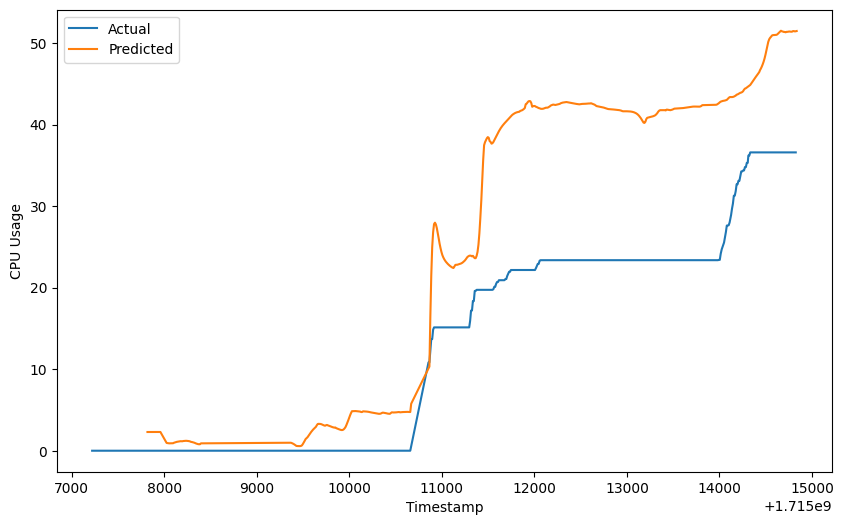

In [39]:
# Plot the data using line plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['compose_post_service_cpu'], label='Actual')
plt.plot(df_predicted['timestamp'], df_predicted['compose_post_service_cpu'], label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()

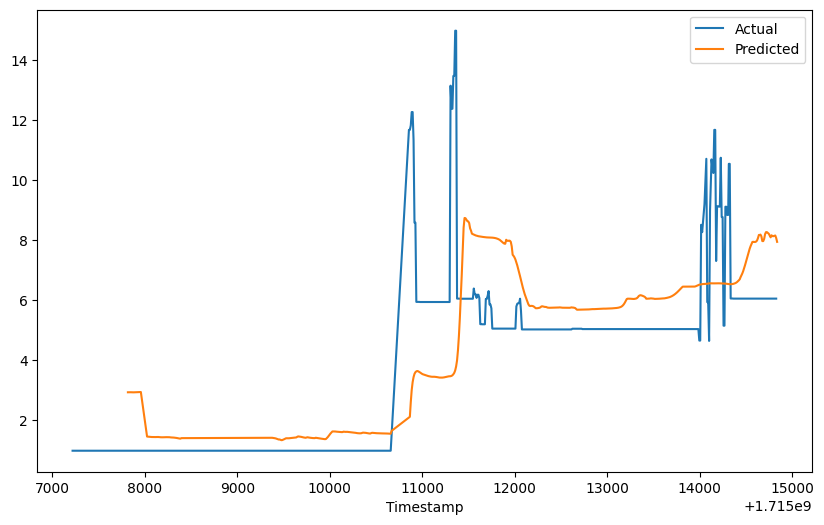

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['compose_post_service_memory'], label='Actual')
plt.plot(df_predicted['timestamp'], df_predicted['compose_post_service_memory'], label='Predicted')
plt.xlabel('Timestamp')
plt.legend()
plt.show()
